In [1]:
# This would be the main notebook that would be run to execute the entire project
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Linear Regression:

In [50]:
from sklearn.linear_model import LinearRegression

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,start_region_id,start_poi_ids,dest_region_id,dest_poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,start_region_id,start_poi_ids,dest_region_id,dest_poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
y = data['order_gap']


# Create a Linear Regression model and fit the data
model = LinearRegression()
model.fit(X, y)

# Predict the values for the test set
y_pred = model.predict(test_data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']])

# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

# Print the accuracy
print("Accuracy of model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)


Accuracy of model: 0.010337428861254105
Mean Absolute Error: 5.749197629946746


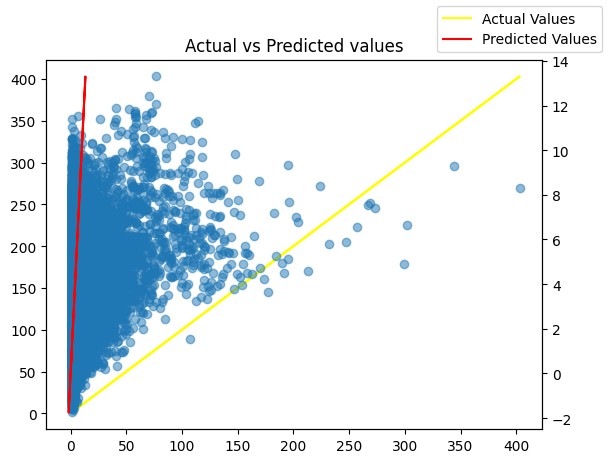

In [51]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


## Decision Tree Regression:

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,region_id,poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
y = data['order_gap']

# Create a Decision Tree Regression model and fit the data
model = DecisionTreeRegressor()
model.fit(X, y)

# Predict the values for the test set
y_pred = model.predict(test_data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']])


# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

# Print the accuracy
print("Accuracy of Decision Tree Regression model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)

Accuracy of Decision Tree Regression model: 0.11533055129663572
Mean Absolute Error: 5.100346020761246


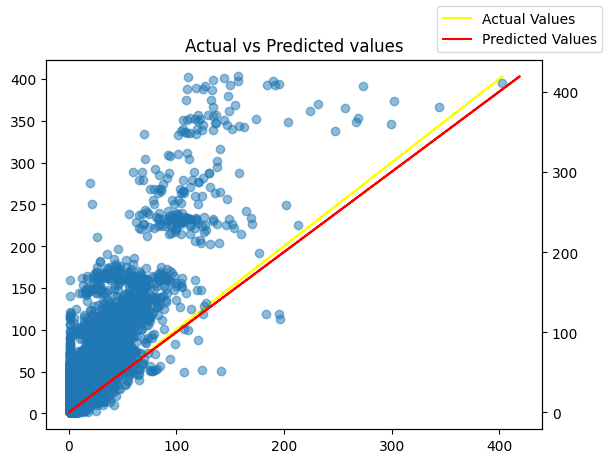

In [22]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


## Random Forest Regression:

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,region_id,poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
y = data['order_gap']

# Create a Random Forest model and fit the data
model = RandomForestRegressor()
model.fit(X, y)

# Predict the values for the test set
y_pred = model.predict(test_data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']])

# print(y_pred)
# print(test_data['supply'])

# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

# Print the accuracy
print("Accuracy of Random Forest Regression model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)

Accuracy of Random Forest Regression model: 0.20244315349240816
Mean Absolute Error: 4.763855059340944


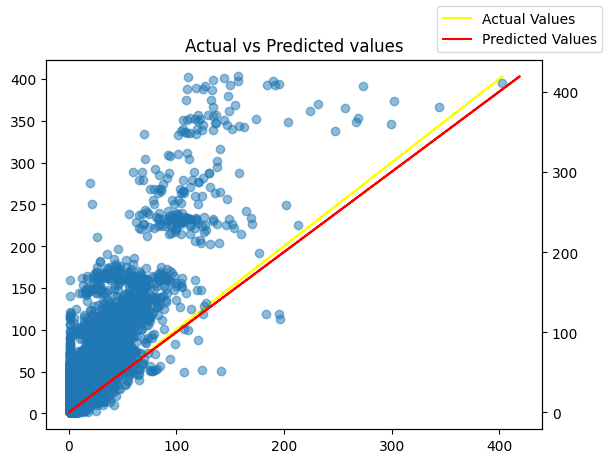

In [21]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


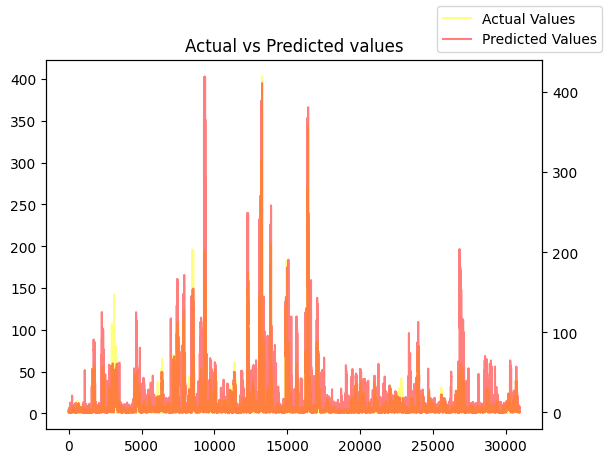

In [24]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], color='yellow', label='Actual Values', alpha=0.5)

ax2 = ax1.twinx()

ax2.plot(y_pred, color='red', label='Predicted Values', alpha=0.5)

plt.title("Actual vs Predicted values")
# plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


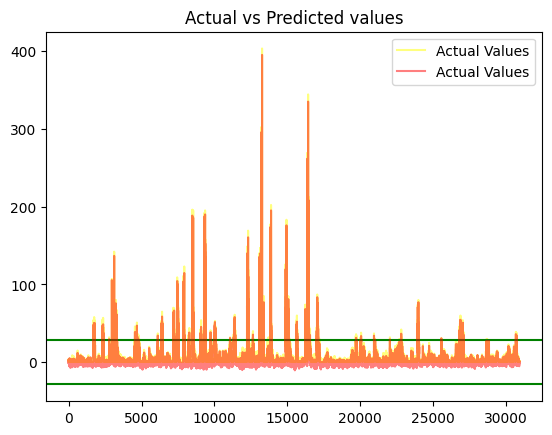

In [43]:
# Plot the predicted values against the actual values in line plot
# difference between actual and predicted values


# calculate the hdi lines for 95% confidence interval
hdi = np.std(test_data['supply']-y_pred)*1.96

# plot the actual values
plt.plot(test_data['supply'], color='yellow', label='Actual Values', alpha=0.5)

# show hdi lines
plt.axhline(y=hdi, color='g', linestyle='-')
plt.axhline(y=-hdi, color='g', linestyle='-')

plt.title("Actual vs Predicted values")

plt.plot(test_data['supply']-y_pred, color='red', label='Actual Values', alpha=0.5)
# skew y axis
# plt.yscale('symlog') 


# # plt.scatter(test_data['supply'], y_pred, alpha=0.5)
plt.legend()
plt.show()


## XGBoost Regression:

In [32]:
# !pip install xgboost

In [11]:
from xgboost import XGBRegressor

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,region_id,poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
y = data['supply']


# Create a XGB model and fit the data
model = XGBRegressor()
model.fit(X, y)

# Predict the values for the test set
y_pred = abs(model.predict(test_data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]))

# print(y_pred)
# print(test_data['supply'])

# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

print("Accuracy of Random Forest Regression model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)

Accuracy of Random Forest Regression model: -1.582244516399844
Mean Absolute Error: 10.510445478924886


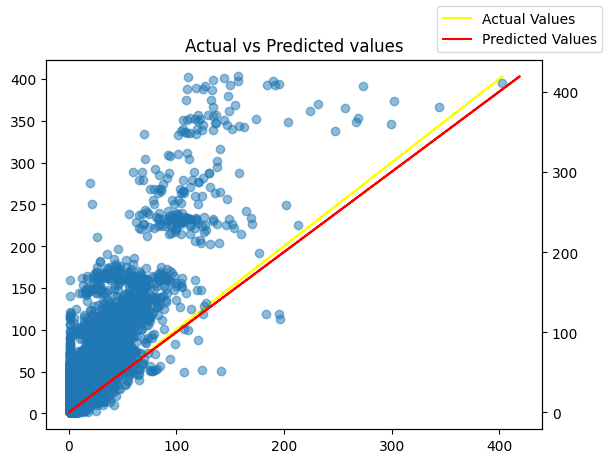

In [20]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


# Final RandomForestRegressor Model with rolling windows: 

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')

# Define the window size
window_size = 300
# Split the data into independent and dependent variables
# and select the first 100 windows of data
X = data[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
y = data['order_gap']


# Create a Linear Regression model
model = RandomForestRegressor()

# Fit the model to the current window of data
model.fit(X, y)

# Create an empty list to store the predicted values for each window
predictions = []

# Iterate through the data using a rolling window approach
for i in range(window_size, len(test_data) + 1):
    # if i % 300 == 0:
    #     print("Window number:", i//300)

    window = test_data.iloc[i - window_size : i, :]
    X_window = window[['time_slot','weekday','temperature','pm25','start_poi_ids','dest_poi_ids']]
    y_window = window['supply']
        
    # Predict the values for the window
    y_pred = model.predict(X_window)
    
    mae = np.mean(np.abs(y_window - y_pred))
    # Add the predicted values to the list
    predictions.append(mae)

# Calculate the mean of the predicted values for all windows
mean_prediction = np.mean(predictions, axis=0)

# Print the result
print('Mean Absolute Error for the mean prediction:', mean_prediction)



KeyboardInterrupt: 

In [ ]:
# Apply a rolling average to the predicted values
window_size = 300
rolling_predictions = pd.Series(predictions).rolling(window_size).mean().values

# Plot the mean predicted values against the actual values
fig, ax1 = plt.subplots()
ax1.plot(test_data['supply'], color='blue', label='Actual Values', alpha=0.5)
ax1.set_ylabel('Actual Values')
ax2 = ax1.twinx()
ax2.plot(rolling_predictions, color='red', label='Mean Predicted Values', alpha=0.5)
ax2.set_ylabel('Mean Predicted Values')
plt.title("Actual vs Mean Predicted values")
fig.legend()
plt.show()

NameError: name 'predictions' is not defined